# Model Building

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11974 non-null  int64  
 1   carname         11974 non-null  object 
 2   price           11974 non-null  float64
 3   milage          11974 non-null  float64
 4   hubraum         11974 non-null  float64
 5   transmission    11974 non-null  object 
 6   num_seats       11974 non-null  object 
 7   num_doors       11974 non-null  object 
 8   emission_class  11974 non-null  object 
 9   car_type        11974 non-null  object 
 10  num_owners      11974 non-null  object 
 11  age             11974 non-null  float64
 12  power_ps        11974 non-null  float64
 13  power_kw        11974 non-null  float64
 14  Schaden         11974 non-null  object 
 15  Model           11974 non-null  object 
 16  amg             11974 non-null  int64  
 17  mc_laren        11974 non-null 

In [4]:
data.columns

Index(['Unnamed: 0', 'carname', 'price', 'milage', 'hubraum', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'age', 'power_ps', 'power_kw', 'Schaden', 'Model', 'amg', 'mc_laren',
       'blk_series', 'blue_eff', 'g_pow', 'brabus', 'avantgarde', 'elegance',
       'tag_63', 'tag_65', 'tag_55', 'tüv', 'E10', 'biodiesel', 'pflanzenöl',
       'electric', 'fueltype'],
      dtype='object')

In [5]:
data_dummies = data.drop(['carname', 'Unnamed: 0', 'power_kw'], axis=1)

In [6]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           11974 non-null  float64
 1   milage          11974 non-null  float64
 2   hubraum         11974 non-null  float64
 3   transmission    11974 non-null  object 
 4   num_seats       11974 non-null  object 
 5   num_doors       11974 non-null  object 
 6   emission_class  11974 non-null  object 
 7   car_type        11974 non-null  object 
 8   num_owners      11974 non-null  object 
 9   age             11974 non-null  float64
 10  power_ps        11974 non-null  float64
 11  Schaden         11974 non-null  object 
 12  Model           11974 non-null  object 
 13  amg             11974 non-null  int64  
 14  mc_laren        11974 non-null  int64  
 15  blk_series      11974 non-null  int64  
 16  blue_eff        11974 non-null  int64  
 17  g_pow           11974 non-null 

In [7]:
data_dummies = pd.get_dummies(data_dummies, dtype=float)

In [8]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Columns: 108 entries, price to fueltype_na
dtypes: float64(92), int64(16)
memory usage: 9.9 MB


In [9]:
data_dummies = data_dummies.astype(float)

In [10]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Columns: 108 entries, price to fueltype_na
dtypes: float64(108)
memory usage: 9.9 MB


### Split Training & Test Data

In [11]:
data_train, data_test = train_test_split(data_dummies, test_size = 0.15, shuffle=True)

### Make Features and label data

In [12]:
y_train = data_train[["price"]]  #Labels
X_train = data_train.drop("price", axis=1)  #Features

y_test = data_test[["price"]]  #Labels
X_test = data_test.drop("price", axis=1)  #Features

### Scale features and labels

In [13]:
method = 'MinMax'

if method == 'Standard':
    scalerx = StandardScaler().fit(X_train)
    scalery = StandardScaler().fit(y_train)
    
elif method == 'MinMax':
    scalerx = MinMaxScaler().fit(X_train)
    scalery = MinMaxScaler().fit(y_train)
    
elif method == 'Robust':
    scalerx = RobustScaler().fit(X_train)
    scalery = RobustScaler().fit(y_train)

In [14]:
X_train = pd.DataFrame(scalerx.transform(X_train), columns=X_train.columns)
y_train = pd.DataFrame(scalery.transform(y_train), columns=y_train.columns)
y_train = y_train.T.squeeze()

X_test = pd.DataFrame(scalerx.transform(X_test), columns=X_test.columns)
y_test = pd.DataFrame(scalery.transform(y_test), columns=y_test.columns)
y_test = y_test.T.squeeze()

### Automating Feature Selection and Regression Model Building

In [15]:
print('Dropping features with p-value P(t) > 0.05: \n')
cols = list(X_train.columns)
pmax = 1
i = 1
while (len(cols) > 0):
    p = []
    X_1 = X_train
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
        X_train = X_train.drop(feature_with_p_max, axis=1)
        X_test = X_test.drop(feature_with_p_max, axis=1)
        print(str(i) + '. Dropped', feature_with_p_max, 'with p-value', pmax)
        i += 1
    else:
        break
selected_features = cols
print('\n\nSelected features: \n\n', selected_features)

Dropping features with p-value P(t) > 0.05: 

1. Dropped num_owners_4 with p-value 0.9772140307493434
2. Dropped num_owners_5 with p-value 0.9310298530026121
3. Dropped fueltype_Hybrid with p-value 0.8674739752399888
4. Dropped Model_GL with p-value 0.7396580280943845
5. Dropped Model_OTHER with p-value 0.7393411785345889
6. Dropped emission_class_Euro6c with p-value 0.752487137831559
7. Dropped fueltype_Erdgas with p-value 0.6956546095116038
8. Dropped num_owners_na with p-value 0.6917252897234871
9. Dropped num_seats_19 with p-value 0.6846582676051813
10. Dropped num_seats_2 with p-value 0.9941244733307373
11. Dropped car_type_kombi with p-value 0.9411018852255373
12. Dropped num_seats_15 with p-value 0.6961406535870811
13. Dropped num_owners_9 with p-value 0.6666427648794327
14. Dropped num_seats_17 with p-value 0.9889104387406686
15. Dropped car_type_suv with p-value 0.5903473527580252
16. Dropped num_owners_6 with p-value 0.5636614719855519
17. Dropped fueltype_na with p-value 0.5

In [16]:
X_train.shape

(10177, 72)

In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
X_test.shape

(1797, 72)

In [19]:
type(X_test)

pandas.core.frame.DataFrame

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     992.5
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:36:22   Log-Likelihood:                 10700.
No. Observations:               10177   AIC:                        -2.126e+04
Df Residuals:                   10106   BIC:                        -2.075e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1739      0.010     16.709      0.000       0.154       0.194
milage                    -0.3446      0.013    -26.462      0.000      -0.370      -0.319
hubraum                   -0.1210      0.015     -7.813      0.000      -0.151      -0.091
age                       -0.2339      0.010    -22.781      0.000      -0.254      -0.214
power_ps                   0.7368      0.015     47.807      0.000       0.707       0.767
amg                        0.0166      0.002      6.762      0.000       0.012       0.021
blk_series                 0.1979      0.038      5.151      0.000       0.123       0.273
blue_eff                  -0.0155      0.004     -3.853      0.000      -0.023      -0.008
elegance                   0.0176      0.007      2.464      0.014       0.004       0.032
tag_63                    -0.0252      0.005     -5.310      0.000      -0.035      -0.016
tag_65                     0.0305      0.015      2.098      0.036       0.002       0.059
tag_55                    -0.0875      0.018     -4.845      0.000      -0.123      -0.052
tüv                        0.0157      0.005      3.068      0.002       0.006       0.026
E10                       -0.0148      0.003     -4.283      0.000      -0.022      -0.008
electric                   0.0625      0.004     14.334      0.000       0.054       0.071
transmission_Automatik    -0.0156      0.003     -5.601      0.000      -0.021      -0.010
num_seats_20               0.2226      0.085      2.607      0.009       0.055       0.390
num_seats_3               -0.0946      0.011     -8.425      0.000      -0.117      -0.073
num_seats_4               -0.0641      0.007     -9.756      0.000      -0.077      -0.051
num_seats_5               -0.0751      0.007    -10.138      0.000      -0.090      -0.061
num_seats_6               -0.0411      0.010     -4.158      0.000      -0.060      -0.022
num_seats_7               -0.0374      0.009     -4.110      0.000      -0.055      -0.020
num_seats_8               -0.0584      0.011     -5.437      0.000      -0.079      -0.037
num_seats_9               -0.0505      0.014     -3.609      0.000      -0.078      -0.023
num_seats_na              -0.0217      0.008     -2.609      0.009      -0.038      -0.005
num_doors_2/3              0.0579      0.011      5.079      0.000       0.036       0.080
num_doors_4/5              0.0636      0.011      5.888      0.000       0.042       0.085
num_doors_6/7              0.0894      0.039      2.278      0.023       0.012       0.166
num_doors_na              -0.0370      0.012     -3.149      0.002      -0.060      -0.014
emission_class_Euro1       0.0946      0.033      2.902      0.004       0.031       0.158
emission_class_Euro2       0.0530      0.019      2.851      0.004       0.017  

In [21]:
def plot(y_pred, y_true, savename, color):
    fig, ax = plt.subplots(figsize=(6, 5)) 
    sns.scatterplot(y=y_true, x=y_pred, color=color, s=5)
    xx = np.linspace(min(y_pred), max(y_pred), num=50)
    plt.plot(xx, xx, color='k', linewidth=2)
    plt.title('Prediction on ' + savename + ' Dataset')
    plt.xlabel('Predicted Price')
    plt.ylabel('True Price')
    plt.tight_layout()
    #ax.xaxis.set_major_formatter(ticker.EngFormatter())
    #ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.grid(True)
    plt.show()
    fig.savefig('Plots/'+savename+'.png', dpi=300)

In [22]:
try:
    test_pred = model.predict(sm.add_constant(X_test))
except:
    test_pred = model.predict(sm.add_constant(X_test, has_constant='add'))

try:
    train_pred = model.predict(sm.add_constant(X_train))
except:
    train_pred = model.predict(sm.add_constant(X_train, has_constant='add'))

In [23]:
def rescale_label(label):
    Y = np.array([label])  # make 2D-Array
    return list(scalery.inverse_transform(Y)[0])

### Performance on unseen Test Dataset

In [24]:
sm.tools.eval_measures.meanabs(y_test, test_pred)

0.057519992354621956

In [25]:
sm.tools.eval_measures.meanabs(rescale_label(y_test), rescale_label(test_pred))

8320.266894096065

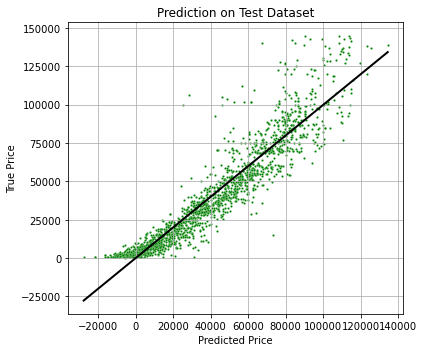

In [26]:
plot(rescale_label(test_pred), rescale_label(y_test), 'Test', 'g')

In [27]:
#plot(test_pred[0], y_test[0], 'Test')

In [28]:
# ROBUST 0.16 8643
# STANDARD 0.23  8478
# MINMAX 0.05  8426

### Performance on seen Training Dataset

In [29]:
sm.tools.eval_measures.meanabs(rescale_label(y_train), rescale_label(train_pred))

8395.54666863115

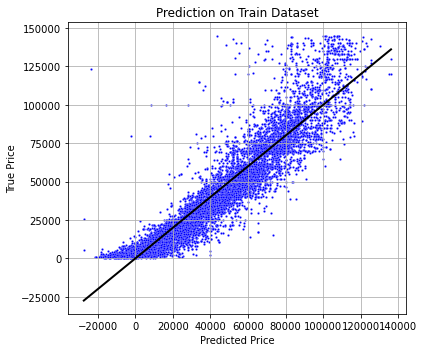

In [30]:
plot(rescale_label(train_pred), rescale_label(y_train), 'Train', 'b')

### Problem of negative Prices

- modelling log-price; this is a common strategy with price-like variables in economics
- using generalized linear models (GLMs). A gamma-model with a log-link would be quite similar to modelling log-price, but the model would be for the expected price rather than expected log-price. This may have some advantages. If you need the relationship with the predictors to be linear in actual price, this can be done (identity link), but a log link for this sort of data would be more common.